In [60]:
#Load package
from bs4 import BeautifulSoup as bs
import urllib3,csv,pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

#Save and Load pokedex data
http = urllib3.PoolManager()
url = 'https://pokemondb.net/pokedex/all'
response = http.request('GET', url).data.decode('utf-8')

soup = bs(response,features="html.parser")
tr = soup.find("table", class_ ="data-table").find("tbody").find_all("tr")
data=[]
for x in tr:
	td = x.find_all("td")
	temp=[]
	for y in range(len(td)):
		temp.append(td[y].get_text().replace("\n",""))
	data.append(temp)

filename = "pokedexall.csv"
with open(filename, 'w', newline="") as csvfile:
	csvwriter = csv.writer(csvfile)
	csvwriter.writerow(["#","Name","Type","Total","HP","Attack","Defense","Sp.Atk","Sp.Def","Speed"])
	csvwriter.writerows(data[0:984])

#Split atribut
df = pd.read_csv("pokedexall.csv")
dfatt = df.iloc[:, 5:7]
x_array = np.array(dfatt)

#Klustering data
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_array)

#Add results to dataframe
df["kluster"] = kmeans.labels_
df["kluster"].value_counts()

0    516
1    293
2    175
Name: kluster, dtype: int64

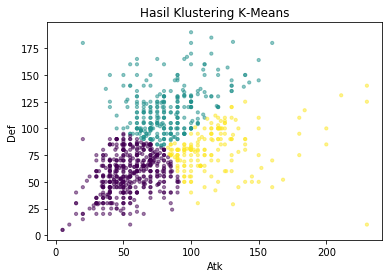

In [61]:
#Create and view scatter plot
fig, ax = plt.subplots()
ax.scatter(x_array[:,1], x_array[:,0], s = 10, c = df.kluster, alpha = 0.5)
plt.title("Hasil Klustering K-Means")
plt.xlabel("Atk")
plt.ylabel("Def")
plt.show()

In [ ]:
#kesimpulan : Data dikelompokkan menjadi 3 bagian dengan metode K-Means berdasarkan def dan atk nya.
#Purple : Pokemon yang memiliki def dan atk kecil.
#Aqua : Pokemon yang memiliki def besar.
#Yellow : Pokemon yang memiliki atk besar.
#Dengan adanya Klustering K-Means ini mempermudah mengelompokkan data berdasarkan atribut tertentu.